#**COVID-19 WORLD ANALYSIS**

##### **PROJECT BY:**
ANUBHAV SHARMA



AKANKSHA YADAV

**WHAT IS CORONAVIRUS?**

Coronavirus is a large family of viruses that can infect animals or humans. In humans, several strains of viruses are known to cause respiratory infections ranging from the common cold to severe diseases such as the Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). The most recently discovered strain is called SARS-CoV-2 strain that is causing COVID19 as it is similar to the SARS-CoV strain that had caused the SARS outbreak.

**COVID-19:** COVID-19 is a disease caused by a new strain of coronavirus. ‘CO’ stands for corona, ‘VI’ for virus, and
‘D’ for disease. Formerly, this disease was referred to as ‘2019 novel coronavirus’ or ‘2019-nCoV.’
The COVID-19 virus is a new virus linked to the same family of viruses as Severe Acute Respiratory
Syndrome (SARS) and some types of common cold. 

#### **PROJECT:**
In this project, we intent to analyze about COVID-19 cases all over the world. We would visualize about different countries having active, confirmed, recovered and death figures. 

**Our main aim:** To predict number of new cases all over the world for upcoming 7 days. 

## **DATA ANALYSIS**

**DATA ACQUISTION**

***Importing Essential Libraries***

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns 
import lxml.html as lh
import statsmodels.api as sm
from bs4 import BeautifulSoup
import requests
import warnings   
warnings.filterwarnings("ignore")           
       


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



***Importing Datasets And Converting Them Into Pandas Dataframe***

In [ ]:
df_cases=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')
df_cases.head()


,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Australia,2020-07-25 18:41:53,-25.0000,133.0000,13950.0,145.0,9017.0,4788.0,54.792476,NaN,NaN,1.039427,36,AUS
1,Austria,2020-07-25 18:41:53,47.5162,14.5501,20338.0,712.0,18124.0,1502.0,225.817197,NaN,NaN,3.500836,40,AUT
2,Canada,2020-07-25 18:41:53,60.0010,-95.0010,115400.0,8927.0,100638.0,5836.0,304.841791,NaN,NaN,7.735702,124,CAN
3,China,2020-07-25 18:41:53,30.5928,114.3055,86202.0,4651.0,80341.0,1210.0,6.136787,NaN,NaN,5.395466,156,CHN
4,Denmark,2020-07-25 18:41:53,56.2639,9.5018,13643.0,613.0,12541.0,489.0,235.540778,NaN,NaN,4.493147,208,DNK


In [ ]:
df_confirmed=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740,34994,35070,35229,35301,35475,35526,35615,35727,35928,35981
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667,3752,3851,3906,4008,4090,4171,4290,4358,4466,4570
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907,14272,14657,15070,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689,20216,20770,21355,21948,22549,23084,23691,24278,24872,25484,26159
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,853,854,854,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,858,861,862,877,880,880,880,884,884,889,889,897
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,142,148,155,166,172,176,183,186,189,197,212,212,259,267,276,284,291,315,328,346,346,346,386,386,396,458,462,506,525,541,576,607,638,687,705,749,779,812,851,880


In [ ]:
df_recovered=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
df_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5164,5508,6158,7660,7962,8292,8764,8841,9260,9869,10174,10306,10674,12604,13934,14131,15651,16041,17331,19164,19366,20103,20179,20700,20847,20882,21135,21216,21254,21454,22456,22824,23151,23273,23634,23741,23741,23924,24550,24602
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1055,1064,1077,1086,1114,1126,1134,1159,1195,1217,1250,1298,1346,1384,1438,1459,1516,1559,1592,1637,1657,1702,1744,1791,1832,1875,1881,1946,2014,2062,2091,2137,2214,2264,2311,2352,2397,2463,2523,2608
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7735,7842,7943,8078,8196,8324,8422,8559,8674,8792,8920,9066,9202,9371,9674,9897,10040,10342,10832,11181,11492,11884,12094,12329,12637,13124,13124,13743,14019,14295,14792,15107,15430,15744,16051,16400,16646,16983,17369,17369
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,789,789,791,792,792,792,792,796,797,797,797,799,799,799,799,799,799,800,800,800,800,800,800,802,802,803,803,803,803,803,803,803,803,803,803,803,803,803,803,803
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,64,64,64,64,66,66,77,77,77,77,81,81,81,81,93,93,97,97,107,108,108,108,117,117,117,117,118,118,118,118,124,124,199,210,221,221,221,221,236,241


In [ ]:
df_death=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,478,491,504,546,548,569,581,598,618,639,675,683,703,721,733,746,774,807,819,826,864,898,920,936,957,971,994,1010,1012,1048,1094,1113,1147,1164,1181,1185,1186,1190,1211,1225
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,36,37,38,39,42,43,44,44,45,47,49,51,53,55,58,62,65,69,72,74,76,79,81,83,83,85,89,93,95,97,101,104,107,111,112,113,117,120,123,128
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,777,788,799,811,825,837,845,852,861,869,878,885,892,897,905,912,920,928,937,946,952,959,968,978,988,996,1004,1011,1018,1028,1040,1052,1057,1068,1078,1087,1100,1111,1124,1136
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,51,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6,6,7,8,8,9,9,10,10,10,10,10,10,11,11,13,15,17,18,19,19,19,21,21,22,23,23,26,26,26,27,28,29,29,29,29,30,33,33,35


In [ ]:
print(df_cases.shape)
print(df_confirmed.shape)
print(df_death.shape)
print(df_recovered.shape)

(188, 14)
(266, 189)
(266, 189)
(253, 189)


***Removing Unnecessary Columns***

In [ ]:
df_cases=df_cases[["Country_Region","Lat","Long_","Confirmed","Deaths","Recovered","Active"]]
df_cases.head(8)

,Country_Region,Lat,Long_,Confirmed,Deaths,Recovered,Active
0,Australia,-25.000000,133.000000,13950.0,145.0,9017.0,4788.0
1,Austria,47.516200,14.550100,20338.0,712.0,18124.0,1502.0
2,Canada,60.001000,-95.001000,115400.0,8927.0,100638.0,5836.0
3,China,30.592800,114.305500,86202.0,4651.0,80341.0,1210.0
4,Denmark,56.263900,9.501800,13643.0,613.0,12541.0,489.0
5,Finland,61.924100,25.748200,7388.0,329.0,6920.0,139.0
6,France,46.227600,2.213700,217797.0,30195.0,80943.0,106659.0
7,Germany,51.165691,10.451526,206156.0,9124.0,189919.0,7113.0


 **DATA WRANGLING OR DATA CLEANING**

In [ ]:
df_cases.isnull().sum()

Country_Region    0
Lat               2
Long_             2
Confirmed         0
Deaths            0
Recovered         3
Active            0
dtype: int64

In [ ]:
df_confirmed.isnull().sum()

Province/State    185
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
7/20/20             0
7/21/20             0
7/22/20             0
7/23/20             0
7/24/20             0
Length: 189, dtype: int64

In [ ]:
df_recovered.isnull().sum()

Province/State    186
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
7/20/20             0
7/21/20             0
7/22/20             0
7/23/20             0
7/24/20             0
Length: 189, dtype: int64

In [ ]:
df_death.isnull().sum()

Province/State    185
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
7/20/20             0
7/21/20             0
7/22/20             0
7/23/20             0
7/24/20             0
Length: 189, dtype: int64

***Visualizing Null Values through Heatmap***

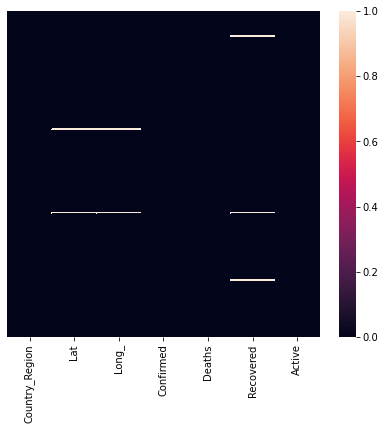

In [ ]:
plt.rcParams['figure.figsize']=7,6
sns.heatmap(df_cases.isnull(),yticklabels=False)
plt.show()

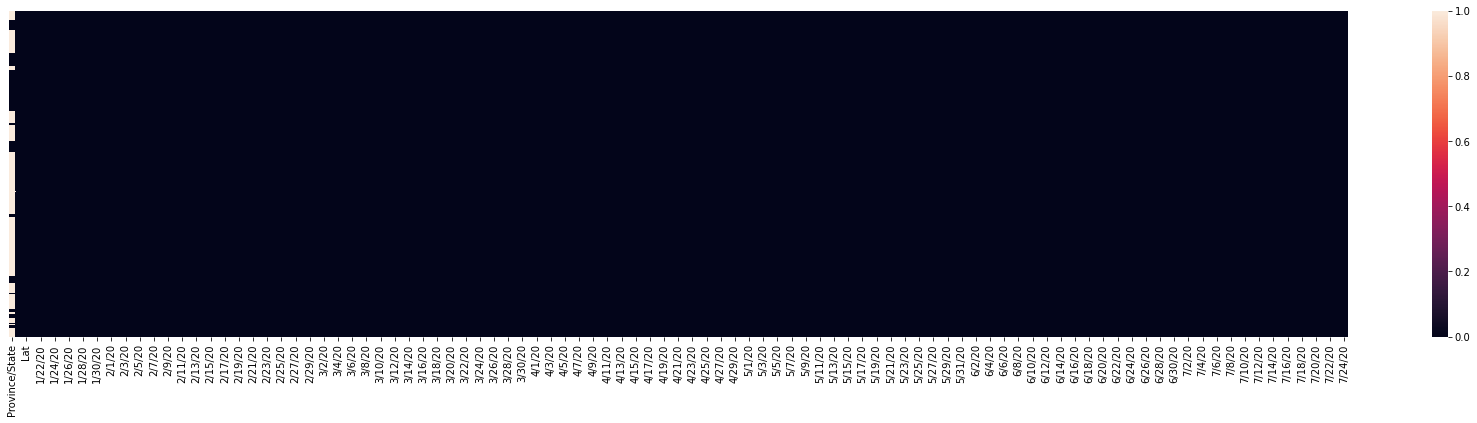

In [ ]:
plt.rcParams['figure.figsize']=30,6
sns.heatmap(df_confirmed.isnull(),yticklabels=False)
plt.show()

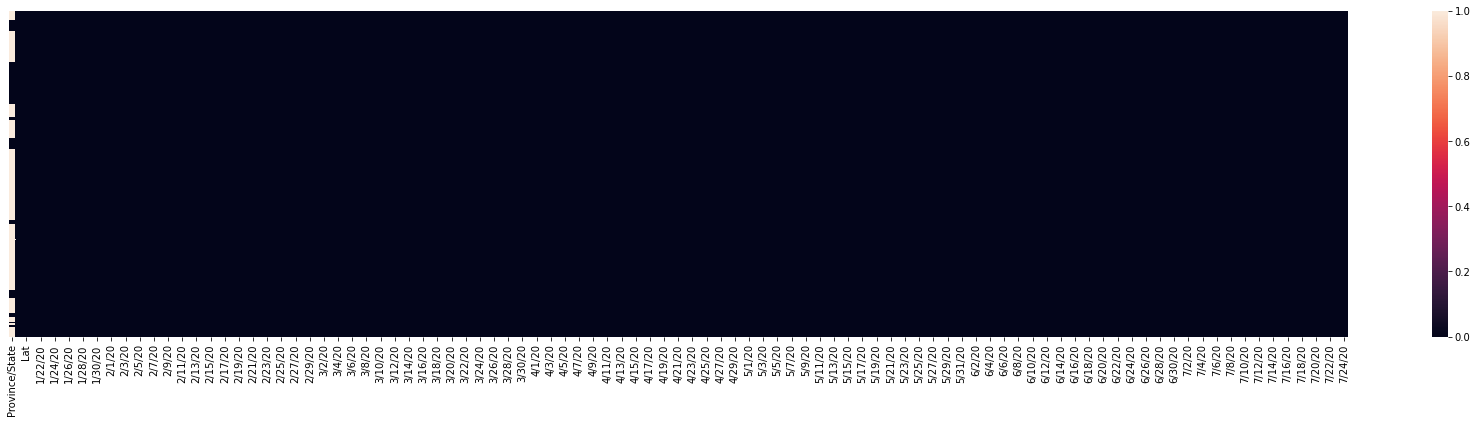

In [ ]:
plt.rcParams['figure.figsize']=30,6
sns.heatmap(df_recovered.isnull(),yticklabels=False)
plt.show()

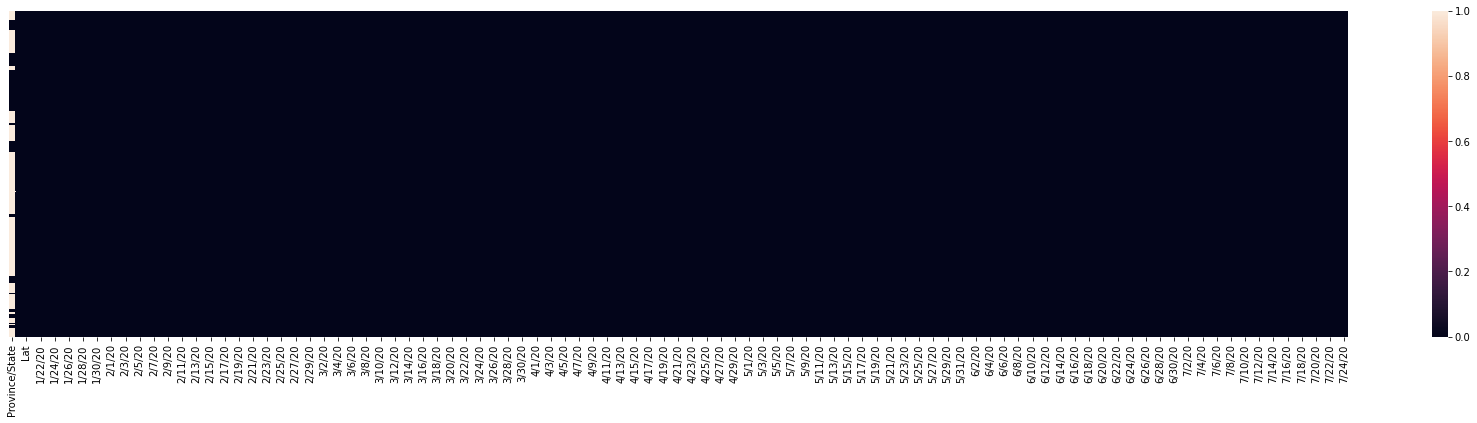

In [ ]:
plt.rcParams['figure.figsize']=30,6
sns.heatmap(df_death.isnull(),yticklabels=False)
plt.show()

***Removing Null Values***

In [ ]:
df_confirmed.dropna(axis=1,inplace=True)
df_confirmed.isnull().sum()

Country/Region    0
Lat               0
Long              0
1/22/20           0
1/23/20           0
                 ..
7/20/20           0
7/21/20           0
7/22/20           0
7/23/20           0
7/24/20           0
Length: 188, dtype: int64

In [ ]:
df_recovered.dropna(axis=1,inplace=True)
df_recovered.isnull().sum()

Country/Region    0
Lat               0
Long              0
1/22/20           0
1/23/20           0
                 ..
7/20/20           0
7/21/20           0
7/22/20           0
7/23/20           0
7/24/20           0
Length: 188, dtype: int64

In [ ]:
df_death.dropna(axis=1,inplace=True)
df_death.isnull().sum()

Country/Region    0
Lat               0
Long              0
1/22/20           0
1/23/20           0
                 ..
7/20/20           0
7/21/20           0
7/22/20           0
7/23/20           0
7/24/20           0
Length: 188, dtype: int64

In [ ]:
df_cases.dropna(axis=0,inplace=True)
df_cases.isnull().sum()

Country_Region    0
Lat               0
Long_             0
Confirmed         0
Deaths            0
Recovered         0
Active            0
dtype: int64

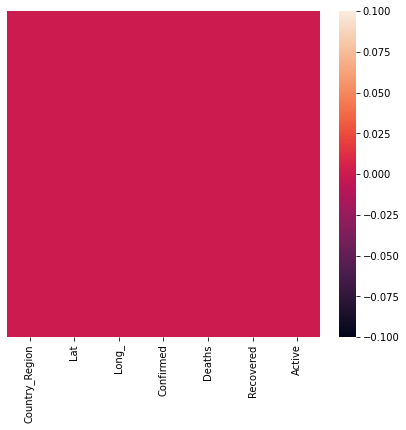

In [ ]:
plt.rcParams['figure.figsize']=7,6
sns.heatmap(df_cases.isnull(),yticklabels=False)
plt.show()

Having null values in datasets may create  problem for further analysis. So it is important to drop or replace the null value. Now as null values in our datasets are cleared, we can proceed further with analysis.

***BASIC INSIGHT OF DATASETS***

In [ ]:
df_cases.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 0 to 187
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country_Region  184 non-null    object 
 1   Lat             184 non-null    float64
 2   Long_           184 non-null    float64
 3   Confirmed       184 non-null    float64
 4   Deaths          184 non-null    float64
 5   Recovered       184 non-null    float64
 6   Active          184 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.5+ KB


In [ ]:
df_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 188 entries, Country/Region to 7/24/20
dtypes: float64(2), int64(185), object(1)
memory usage: 390.8+ KB


In [ ]:
df_recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Columns: 188 entries, Country/Region to 7/24/20
dtypes: float64(2), int64(185), object(1)
memory usage: 371.7+ KB


In [ ]:
df_cases.describe(include="all")

,Country_Region,Lat,Long_,Confirmed,Deaths,Recovered,Active
count,184,184.000000,184.00000,1.840000e+02,184.000000,1.840000e+02,1.840000e+02
unique,184,NaN,NaN,NaN,NaN,NaN,NaN
top,Pakistan,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,19.849492,17.53869,8.543611e+04,3451.320652,4.969640e+04,3.245006e+04
std,NaN,23.651446,57.69208,3.695979e+05,13972.905686,1.813151e+05,2.105688e+05
min,NaN,-40.900600,-102.55280,1.000000e+01,0.000000,8.000000e+00,0.000000e+00
25%,NaN,5.079216,-7.82520,1.096000e+03,18.500000,6.535000e+02,1.472500e+02
50%,NaN,18.422650,19.60115,4.915500e+03,93.500000,3.195500e+03,1.599000e+03
75%,NaN,40.223242,45.04844,3.872825e+04,719.250000,2.372125e+04,7.791250e+03


### **EXPLORATORY DATA ANALYSIS(EDA)**

***CORRELATION-Finding Relationship Between Variables ***

In [ ]:
correlation=df_cases.corr()

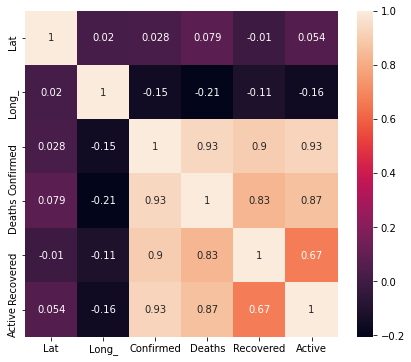

In [ ]:
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

Correlation gives us the relationship between each and every variable. Heatmap is a visualization technique to observe correlation between variables in an interesting form.

### **DATA VISUALIZATION**  



#### **SPREAD ACROSS THE WORLD**




**Number Of Confirmed Cases**

In [ ]:
f = folium.Figure(width=1000, height=500)
world_map_confirmed=folium.Map(location=[20,0],tiles='cartodbdark_matter',zoom_start=2).add_to(f)
for lat,lng,confirmed in zip(df_cases['Lat'],df_cases['Long_'],df_cases['Confirmed']):
    label='{}'.format(confirmed)
    label=folium.Popup(label,parse_html=True)
    folium.CircleMarker([lat,lng],
                       radius=confirmed/80000,
                       popup=label,
                        color='crimson',
                        fill_color='#DC143C ',
                        fill=True,
                        fill_opacity=0.7,
                        parse_html=False).add_to(world_map_confirmed)

world_map_confirmed

We can see that USA , Brazil ,India and Russia are some of the worst hit countries by covid 19 in terms of confirmed cases


**Number Of Recovered Cases**

In [ ]:
f = folium.Figure(width=1000, height=500)
world_map_recovered=folium.Map(location=[20,0],tiles='cartodbdark_matter',zoom_start=2).add_to(f)
for lat,lng,recovered in zip(df_cases['Lat'],df_cases['Long_'],df_cases['Recovered']):
    label='{}'.format(recovered)
    label=folium.Popup(label,parse_html=True)
    folium.CircleMarker([lat,lng],
                       radius=recovered/80000,
                       popup=label,
                       color='#32CD32',
                       fill_color='#32CD32',
                       fill=True,
                       fill_opacity=0.7,
                       parse_html=False).add_to(world_map_recovered)
world_map_recovered


**Number Of Deaths**

In [ ]:
f = folium.Figure(width=1000, height=500)
world_map_death=folium.Map(location=[20,0],tiles='cartodbdark_matter',zoom_start=2).add_to(f)
for lat,lng,death in zip(df_cases['Lat'],df_cases['Long_'],df_cases['Deaths']):
    label='{}'.format(death)
    label=folium.Popup(label,parse_html=True)
    if(death==0):
        pass
    else:
        folium.CircleMarker([lat,lng],
                       
                       radius=death/8000,
                       popup=label,
                       color='red',
                       fill_color='red',
                       fill=True,
                       fill_opacity=0.7,
                       parse_html=False).add_to(world_map_death)
world_map_death

Here we can see that even though India and Russia are some of the worst hit countries in terms of confirmed cases but they have managed to contain death rate.

Visualized confirmed, recovered and death cases over the world map to find perceptible idea about these.

**OBSERVATION:** We observed that North America mainly USA has most number of confirmed cases all over the world with high number in death tolls.

**Percentage of Confirmed,Deaths and Recovered**

In [ ]:
df_distribution=df_cases.drop(columns={'Country_Region','Lat','Long_','Active'})
df_distribution=pd.DataFrame(df_distribution.sum().transpose())

<Figure size 504x432 with 0 Axes>

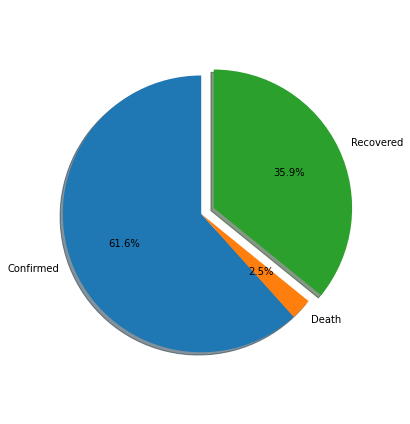

In [ ]:
plt.figure()
fig,ax=plt.subplots(figsize=(6,6))
plt.subplots_adjust(left=0.5,wspace=0.2)
ax.pie(df_distribution.iloc[0:3,0],explode=(0,0,0.1),labels=['Confirmed','Death','Recovered'],autopct='%1.1f%%',shadow=True,startangle=90)
ax.axis('equal')

plt.tight_layout()
plt.show()

The world has managed to contain death rate to 2.7 percent while the recovery rate is 35% which means the world is slowly developing herd immunity 


### **TOP 6 COUNTRIES MOST AFFECTED BY CORONAVIRUS**

In [ ]:
df=df_cases.drop(['Last_Update','Lat','Long_','Incident_Rate', 'Mortality_Rate'],axis=1)
df.head()

,Country_Region,Confirmed,Deaths,Recovered,Active
0,Australia,10810.0,113.0,8036.0,2661.0
1,Austria,19270.0,711.0,17244.0,1315.0
2,Canada,110693.0,8857.0,74067.0,27770.0
3,China,85247.0,4644.0,80005.0,598.0
4,Denmark,13293.0,610.0,12383.0,300.0


In [ ]:
df1=df[df["Country_Region"]=="US"]
df2=df[df["Country_Region"]=="India"]
df3=df[df["Country_Region"]=="Spain"]
df4=df[df["Country_Region"]=="United Kingdom"]
df5=df[df["Country_Region"]=="Brazil"]
df6=df[df["Country_Region"]=="Russia"]
df_merged= pd.concat([df1, df2,df3,df4,df5,df6],ignore_index=True)
df_merged.head()

,Country_Region,Confirmed,Deaths,Recovered,Active
0,US,3499398.0,137419.0,1075882.0,2329738.0
1,India,968857.0,24914.0,612768.0,331175.0
2,Spain,257494.0,28413.0,150376.0,78705.0
3,United Kingdom,293469.0,45138.0,1386.0,246945.0
4,Brazil,1966748.0,75366.0,1350098.0,541284.0


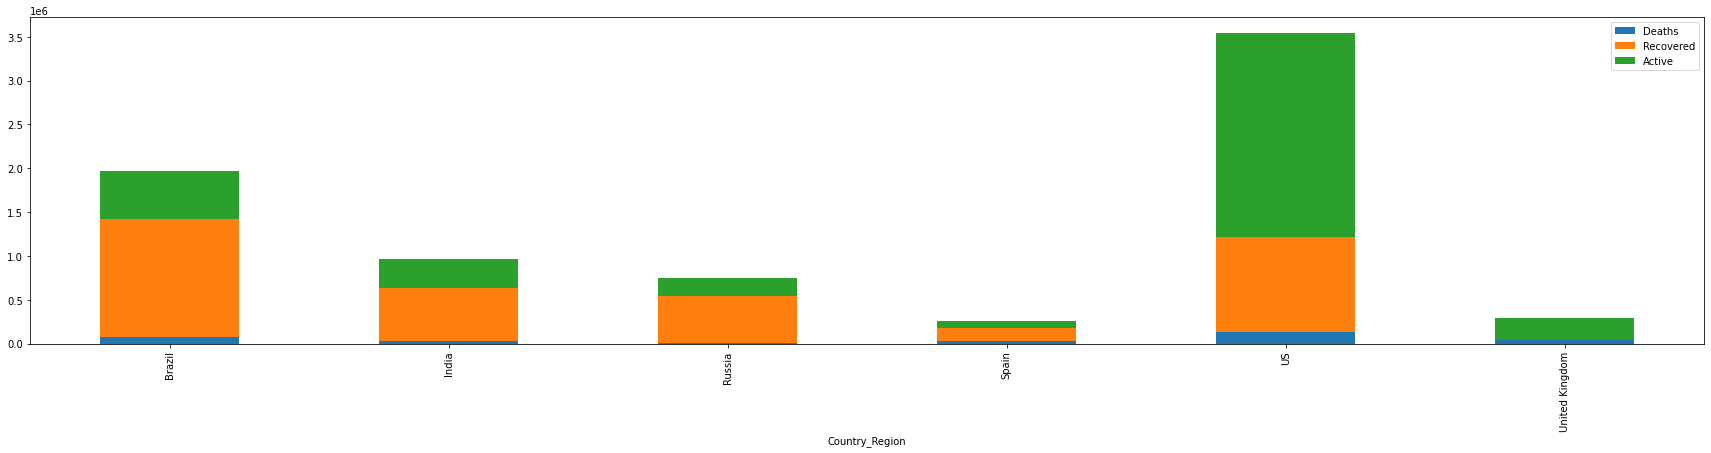

In [ ]:
x= df_merged[['Country_Region','Deaths','Recovered','Active' ]]
y= x.set_index('Country_Region')
z=y.groupby('Country_Region').mean()

z.plot.bar(stacked=True)

Through Marimekko plot, we understood sections of deaths,recovered and active cases for 6 top countries which have most cases, where US stands at top followed by Brazil in most affected countries.

### **CASES RISING EVERYDAY**

In [ ]:
dtf = df_confirmed.drop(['Lat','Long'], axis=1).groupby("Country/Region").sum().T
dtf.index = pd.to_datetime(dtf.index, infer_datetime_format=True)
dtf = pd.DataFrame(index=dtf.index, data=dtf["Italy"].values, columns=["total"])


dtf["new"] = dtf["total"] - dtf["total"].shift(1)
dtf["new"] = dtf["new"].fillna(method='bfill')

dtf['index1'] = dtf.index
dtf=dtf.rename(columns = {"index1":"Dates"})
dtf.tail()


,total,new,Dates
2020-07-11,242827,188.0,2020-07-11
2020-07-12,243061,234.0,2020-07-12
2020-07-13,243230,169.0,2020-07-13
2020-07-14,243344,114.0,2020-07-14
2020-07-15,243506,162.0,2020-07-15


In [ ]:
dtf1 = df_confirmed.drop(['Lat','Long'], axis=1).groupby("Country/Region").sum().T
dtf1.index = pd.to_datetime(dtf1.index, infer_datetime_format=True)
dtf1 = pd.DataFrame(index=dtf1.index, data=dtf1["India"].values, columns=["total"])
dtf1["new"] = dtf1["total"] - dtf1["total"].shift(1)
dtf1["new"] = dtf1["new"].fillna(method='bfill')
dtf1['index1'] = dtf1.index
dtf1=dtf1.rename(columns = {"index1":"Dates"})

dtf1.tail()

,total,new,Dates
2020-07-11,849522,28606.0,2020-07-11
2020-07-12,878254,28732.0,2020-07-12
2020-07-13,906752,28498.0,2020-07-13
2020-07-14,936181,29429.0,2020-07-14
2020-07-15,968857,32676.0,2020-07-15


In [ ]:
dtf2 = df_confirmed.drop(['Lat','Long'], axis=1).groupby("Country/Region").sum().T
dtf2.index = pd.to_datetime(dtf2.index, infer_datetime_format=True)
dtf2 = pd.DataFrame(index=dtf2.index, data=dtf2["US"].values, columns=["total"])
dtf2["new"] = dtf2["total"] - dtf2["total"].shift(1)
dtf2["new"] = dtf2["new"].fillna(method='bfill')
dtf2['index1'] = dtf2.index
dtf2=dtf2.rename(columns = {"index1":"Dates"})

dtf2.tail()

,total,new,Dates
2020-07-11,3245925,61352.0,2020-07-11
2020-07-12,3304942,59017.0,2020-07-12
2020-07-13,3364157,59215.0,2020-07-13
2020-07-14,3431574,67417.0,2020-07-14
2020-07-15,3497847,66273.0,2020-07-15


In [ ]:
dtf4 = df_confirmed.drop(['Lat','Long'], axis=1).groupby("Country/Region").sum().T
dtf4.index = pd.to_datetime(dtf4.index, infer_datetime_format=True)
dtf4 = pd.DataFrame(index=dtf4.index, data=dtf4["Russia"].values, columns=["total"])
dtf4["new"] = dtf4["total"] - dtf4["total"].shift(1)
dtf4["new"] = dtf4["new"].fillna(method='bfill')
dtf4['index1'] = dtf4.index
dtf4=dtf4.rename(columns = {"index1":"Dates"})

dtf4.tail()

,total,new,Dates
2020-07-11,719449,6586.0,2020-07-11
2020-07-12,726036,6587.0,2020-07-12
2020-07-13,732547,6511.0,2020-07-13
2020-07-14,738787,6240.0,2020-07-14
2020-07-15,745197,6410.0,2020-07-15


In [ ]:
dtf5 = df_confirmed.drop(['Lat','Long'], axis=1).groupby("Country/Region").sum().T
dtf5.index = pd.to_datetime(dtf5.index, infer_datetime_format=True)
dtf5 = pd.DataFrame(index=dtf5.index, data=dtf5["South Africa"].values, columns=["total"])
dtf5["new"] = dtf5["total"] - dtf5["total"].shift(1)
dtf5["new"] = dtf5["new"].fillna(method='bfill')
dtf5['index1'] = dtf5.index
dtf5=dtf5.rename(columns = {"index1":"Dates"})

dtf5.tail()

,total,new,Dates
2020-07-11,264184,13497.0,2020-07-11
2020-07-12,276242,12058.0,2020-07-12
2020-07-13,287796,11554.0,2020-07-13
2020-07-14,298292,10496.0,2020-07-14
2020-07-15,311049,12757.0,2020-07-15


In [ ]:
trace0=go.Scatter(
        x=dtf['Dates'],
        y=dtf['new'],
        fill='tozeroy',
        mode='none',
        name='Cases in Italy')

trace1=go.Scatter(
        x=dtf1['Dates'],
        y=dtf1['new'],
        fill='tozeroy',
        mode='none',
        name='Cases in India')

trace2=go.Scatter(
        x=dtf2['Dates'],
        y=dtf2['new'],
        fill='tozeroy',
        mode='none',
        name='Cases in United States')

trace4=go.Scatter(
        x=dtf4['Dates'],
        y=dtf4['new'],
        fill='tozeroy',
        mode='none',
        name='Cases in Russia')
trace5=go.Scatter(
        x=dtf5['Dates'],
        y=dtf5['new'],
        fill='tozeroy',
        mode='none',
        name='Cases in South Africa')

data=[trace0,trace1,trace2,trace4,trace5]
layout=go.Layout(title='Cases Rising Everyday')
fig=go.Figure(data,layout)
fig.show()

Here we can see that though US and Italy were growing at same rate in April but italy has managed to contain the number of cases in its country and has actually flattened the curve while USA continues to grow

**DAILY CASES ALL OVER THE WORLD** 

In [ ]:
df_bar=df_confirmed.drop({'Lat','Long','Country/Region'},axis=1)
df_bar=pd.DataFrame(df_bar.sum())
df_bar=df_bar.reset_index()
df_bar=df_bar.rename(columns={'index':'dates',0:'Total Confirmed cases'})
df_bar['Daily New Cases']= df_bar['Total Confirmed cases'].sub(df_bar['Total Confirmed cases'].shift())
df_bar.iloc[0,2]=df_bar.iloc[0,1]
df_bar.head()

,dates,Total Confirmed cases,Daily New Cases
0,1/22/20,555,555.0
1,1/23/20,654,99.0
2,1/24/20,941,287.0
3,1/25/20,1434,493.0
4,1/26/20,2118,684.0


In [ ]:
fig=go.Figure()
fig.add_trace(go.Bar(x=df_bar['dates'],
                     y=df_bar['Daily New Cases'],
                     name='New Cases',
                     marker_color='purple'))
fig.show()

Here we can see that since many countries are coming out of the lockdown cases are increasing daily at an exponential rate.


**DAILY RECOVERIES ALL OVER THE WORLD**

In [ ]:
df_bar_recovered=df_recovered.drop({'Lat','Long','Country/Region'},axis=1)
df_bar_recovered=pd.DataFrame(df_bar_recovered.sum())
df_bar_recovered=df_bar_recovered.reset_index()
df_bar_recovered=df_bar_recovered.rename(columns={'index':'dates',0:'Total Recoveries'})
df_bar_recovered['Daily New Recoveries']= df_bar_recovered['Total Recoveries'].sub(df_bar_recovered['Total Recoveries'].shift())
df_bar_recovered.iloc[0,2]=df_bar_recovered.iloc[0,1]
df_bar_recovered.head()

,dates,Total Recoveries,Daily New Recoveries
0,1/22/20,28,28.0
1,1/23/20,30,2.0
2,1/24/20,36,6.0
3,1/25/20,39,3.0
4,1/26/20,52,13.0


In [ ]:

fig=go.Figure()
fig.add_trace(go.Bar(x=df_bar_recovered['dates'],
                     y=df_bar_recovered['Daily New Recoveries'],
                     name='New Recoveries',
                     marker_color='green'

    
))
fig.show()

From this we can infer that since many companies are coming up with various medicines , recovery rate has increased . Since people around the globe are focusing more on their immunity we are seeing people getting recovered at a faster rate but the question remains that can we achieve herd immunity before causing a lot of deaths?



**DAILY DEATHS ALL OVER THE WORLD**

In [ ]:
df_bar_death=df_death.drop({'Lat','Long','Country/Region'},axis=1)
df_bar_death=pd.DataFrame(df_bar_death.sum())
df_bar_death=df_bar_death.reset_index()
df_bar_death=df_bar_death.rename(columns={'index':'dates',0:'Deaths'})
df_bar_death['new_deaths']= df_bar_death['Deaths'].sub(df_bar_death['Deaths'].shift())

df_bar_death.iloc[0,2]=df_bar_death.iloc[0,1]
df_bar_death.head()

,dates,Deaths,new_deaths
0,1/22/20,17,17.0
1,1/23/20,18,1.0
2,1/24/20,26,8.0
3,1/25/20,42,16.0
4,1/26/20,56,14.0


In [ ]:

fig=go.Figure()
fig.add_trace(go.Bar(x=df_bar_death['dates'],
                     y=df_bar_death['new_deaths'],
                     name='daily deaths',
                     marker_color='red'

    
))
fig.show()

We can see that we are somehow reducing number of deaths as more and more healthcare workers are coming with more and more combination of treatments and the people around the world are taking care of their immunity

**Comparing daily Confirmed,deaths,active and recovered**

In [ ]:
ts_active=pd.Series(
    data=np.array(
    [x1-x2-x3 for (x1,x2,x3) in zip(df_bar['Total Confirmed cases'],df_bar_death['Deaths'],df_bar_recovered['Total Recoveries'])]),index=df_bar_recovered['dates'])
ts_active=ts_active.reset_index()
ts_active=ts_active.rename(columns={0:'active'})
ts_active.head()

,dates,active
0,1/22/20,510
1,1/23/20,606
2,1/24/20,879
3,1/25/20,1353
4,1/26/20,2010


In [ ]:
trace0=go.Scatter(
        x=df_bar['dates'],
        y=df_bar['Total Confirmed cases'],
        mode='lines',
        name='Total num of cases')

trace1=go.Scatter(
        x=df_bar_recovered['dates'],
        y=df_bar_recovered['Total Recoveries'],
        mode='lines',
        name='Total recoveries')

trace2=go.Scatter(
        x=df_bar_death['dates'],
        y=df_bar_death['Deaths'],
        mode='lines',
        name='Total deaths')

trace3=go.Scatter(
        x=ts_active['dates'],
        y=ts_active['active'],
        mode='lines',
        name='Total active cases')


In [ ]:
data=[trace0,trace1,trace2,trace3]
layout=go.Layout(title='Corona Virus scenario')
fig=go.Figure(data,layout)
fig.show()

We can see that though total number of cases are increasing daily but number of recoveries have overtaken number of acitve cases which is a good sign of recovery. Also acitve cases curve is starting to flatten out which means both our confirmed cases and recoveries are increasing exponentially

### **COMPARING CONFIRMED CASES USING PIE-CHART**

In [ ]:
df_cases['Confirmed'].sum()

12697136.0

In [ ]:
df_merged2=df_merged.drop(["Deaths","Recovered","Active"],axis=1)

df_merged2.head()

,Country_Region,Confirmed
0,US,3269531.0
1,India,849553.0
2,Spain,253908.0
3,United Kingdom,291154.0
4,Brazil,1839850.0


In [ ]:
df_merged2.drop(df_merged2.index[2], inplace=True)


In [ ]:
df_merged2.drop(df_merged2.index[4], inplace=True)

In [ ]:
df_merged2.head()

,Country_Region,Confirmed
0,US,3269531.0
1,India,849553.0
3,United Kingdom,291154.0
4,Brazil,1839850.0


In [ ]:
df_mergedf=pd.DataFrame({"Country_Region":["Others"], 
                    "Confirmed":[5708198]}) 
df_mergedf.head()

,Country_Region,Confirmed
0,Others,5708198


In [ ]:
df_piee=df_merged2.append(df_mergedf, ignore_index = True) 
df_piee

,Country_Region,Confirmed
0,US,3269531.0
1,India,849553.0
2,United Kingdom,291154.0
3,Brazil,1839850.0
4,Others,5708198.0


<Figure size 2160x432 with 0 Axes>

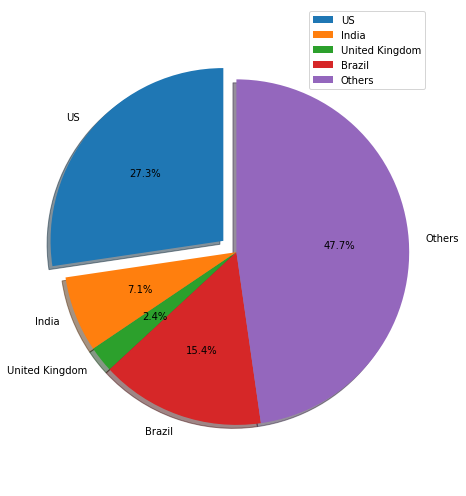

In [ ]:
plt.figure()
fig,ax=plt.subplots(figsize=(7,7))
plt.subplots_adjust(left=0.5,wspace=0.2)
ax.pie(df_piee['Confirmed'].head(),explode=(0.1,0,0,0,0),labels=df_piee['Country_Region'].head(),autopct='%1.1f%%',shadow=True,startangle=90)
ax.axis('equal')
plt.legend(df_piee['Country_Region'].head(),loc="best")
plt.tight_layout()
plt.show()

Only 4 countries account for more than 50% of cases in the whole world

### **MORTALITY RATE AS PER AGE**

Here we got data from New York City Health as of May 13, 2020 of 15230 deaths of individuals and we will try to show which age group is affected the most by covid 19 

In [ ]:
source=requests.get("https://www.worldometers.info/coronavirus/coronavirus-age-sex-demographics/").text
soup=BeautifulSoup(source,'lxml')
table = soup.find('table',class_="table table-hover table-bordered table-condensed table-list")
row=[]
table_rows=table.find_all('tr')
for tr in table_rows:
    td=tr.find_all('td')
    rows=[i.text for i in td]
    row.append(rows)
df=pd.DataFrame()
df=df.append(row)
df.drop([0,6],axis=0,inplace=True)
df.drop([1,3,4,5,6],axis=1,inplace=True)
df.rename(columns={0:'Age',2:'Percentage of death'},inplace=True)
df.head()

,Age,Percentage of death
1,0 - 17 years old,0.06%
2,18 - 44 years old,3.9%
3,45 - 64 years old,22.4%
4,65 - 74 years old,24.9%
5,75+ years old,48.7%


In [ ]:
df['Percentage of death'] = df['Percentage of death'].str.replace('%','')
df.head()

,Age,Percentage of death
1,0 - 17 years old,0.06
2,18 - 44 years old,3.9
3,45 - 64 years old,22.4
4,65 - 74 years old,24.9
5,75+ years old,48.7


<Figure size 2160x432 with 0 Axes>

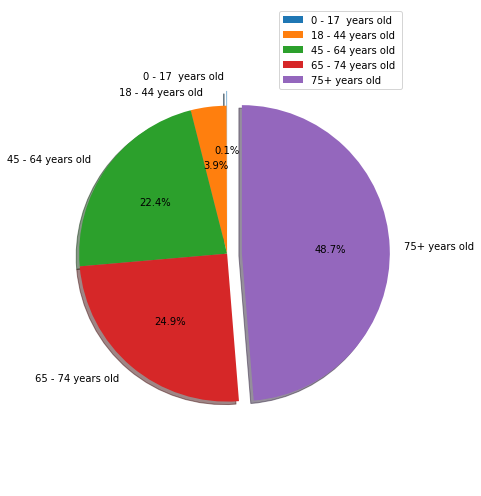

In [ ]:
plt.figure()
fig,ax=plt.subplots(figsize=(7,7))
plt.subplots_adjust(left=0.5,wspace=0.2)
ax.pie(df['Percentage of death'].head(),explode=(0.1,0,0,0,0.1),labels=df['Age'].head(),autopct='%1.1f%%',shadow=True,startangle=90)
ax.axis('equal')
plt.legend(df['Age'].head(),loc="best")
plt.tight_layout()
plt.show()

Covid 19 is hardly affecting 0-17 years old and mostly affecting 75+ years old

**Death Rate** = (number of deaths / number of cases) = probability of dying if infected by the virus (%). This probability differs depending on pre-existing condition. The percentage shown below does NOT represent in any way the share of deaths by pre-existing condition. Rather, it represents, for a patient with a given pre-existing condition, the risk of dying if infected by COVID-19.

In [ ]:
source=requests.get("https://www.worldometers.info/coronavirus/coronavirus-age-sex-demographics/").text
soup=BeautifulSoup(source,'lxml')
table = soup.find('div',class_="table-responsive",style='max-width:500px')
row=[]
table_rows=table.find_all('tr')
for tr in table_rows:
    td=tr.find_all('td')
    rows=[i.text for i in td]
    row.append(rows)

df2=pd.DataFrame()
df2=df2.append(row)   
df2.drop({1},axis=1,inplace=True)
df2.drop({0},axis=0,inplace=True)
df2.rename(columns={0:'Pre_existing_conditions',2:'Death_rate'},inplace=True)
df2

,Pre_existing_conditions,Death_rate
1,Cardiovascular disease,10.5%
2,Diabetes,7.3%
3,Chronic respiratory disease,6.3%
4,Hypertension,6.0%
5,Cancer,5.6%
6,no pre-existing conditions,0.9%


In [ ]:
fig = px.line_polar(df2, r='Death_rate', theta='Pre_existing_conditions', line_close=True)
fig.update_traces(fill='toself',fillcolor='Pink')
fig.show()

People with Cardiovascular disease are worst hit by covid 19

**PREDICTIONS** 

In [ ]:
df_bar.drop({'Total Confirmed cases'},axis=1,inplace=True)
df_bar.head()


,dates,Daily New Cases
0,1/22/20,555.0
1,1/23/20,99.0
2,1/24/20,287.0
3,1/25/20,493.0
4,1/26/20,684.0


In [ ]:
df_bar['dates'] = df_bar['dates'].str.replace('/','-')
df_bar['Daily New Cases'] = df_bar['Daily New Cases'].astype(float)
df_bar['dates']= pd.to_datetime(df_bar['dates']) 
df_bar.set_index('dates', inplace=True)
df_bar.index = pd.to_datetime(df_bar.index)
df_bar.dtypes

Daily New Cases    float64
dtype: object

In [ ]:
df_bar.head()

,Daily New Cases
dates,
2020-01-22,555.0
2020-01-23,99.0
2020-01-24,287.0
2020-01-25,493.0
2020-01-26,684.0


In [ ]:
df_bar.tail()

,Daily New Cases
dates,
2020-07-07,209506.0
2020-07-08,211878.0
2020-07-09,227038.0
2020-07-10,229949.0
2020-07-11,219441.0


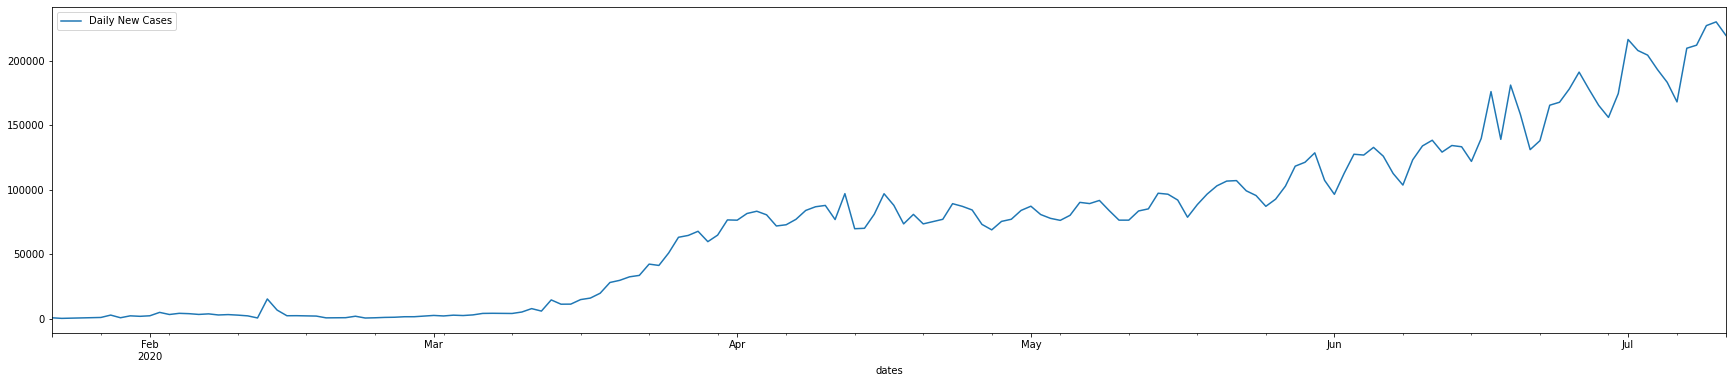

In [ ]:
df_bar.plot()

In [ ]:
! pip install pyramid-arima


     |████████████████████████████████| 604kB 7.7MB/s 


In [ ]:
#using grid search for finding order and seasonal order in SARIMAX
model_an=auto_arima(df_bar,trace=True,seasonal=True,error_action='ignore',supress_warnings=True,stepwise=True)
model_an.fit(df_bar)

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=3664.932, BIC=3683.782, Fit time=0.476 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=3660.537, BIC=3666.821, Fit time=0.015 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=3659.640, BIC=3669.065, Fit time=0.025 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=3657.990, BIC=3667.415, Fit time=0.034 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=3659.297, BIC=3671.864, Fit time=0.093 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=3643.169, BIC=3655.736, Fit time=0.193 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=3642.366, BIC=3661.216, Fit time=0.330 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=3665.731, BIC=3681.439, Fit time=0.095 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=3636.144, BIC=3658.136, Fit time=0.514 seconds
Fit ARIMA: order=(2, 1, 4) seasonal_o

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: order=(3, 1, 5) seasonal_order=(0, 0, 0, 1); AIC=3579.510, BIC=3610.927, Fit time=1.122 seconds
Fit ARIMA: order=(2, 1, 5) seasonal_order=(0, 0, 0, 1); AIC=3576.621, BIC=3604.896, Fit time=0.916 seconds
Fit ARIMA: order=(1, 1, 4) seasonal_order=(0, 0, 0, 1); AIC=3649.504, BIC=3671.496, Fit time=0.274 seconds
Fit ARIMA: order=(1, 1, 5) seasonal_order=(0, 0, 0, 1); AIC=3629.207, BIC=3654.340, Fit time=0.248 seconds
Total fit time: 5.111 seconds


ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(2, 1, 5),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
      suppress_warnings=False, transparams=True, trend='c')

In [ ]:
sm.tsa.SARIMAX 

statsmodels.tsa.statespace.sarimax.SARIMAX

In [ ]:
model_sarimax=sm.tsa.SARIMAX(df_bar['Daily New Cases'],order=(2,1,5),seasonal_order=(0,0,0,1))
sarimax_result=model_sarimax.fit()
sarimax_result.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:        Daily New Cases   No. Observations:                  172
Model:               SARIMAX(2, 1, 5)   Log Likelihood               -1781.493
Date:                Sun, 12 Jul 2020   AIC                           3578.985
Time:                        16:20:40   BIC                           3604.118
Sample:                    01-22-2020   HQIC                          3589.183
                         - 07-11-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2363      0.023     53.980      0.000       1.191       1.281
ar.L2         -0.9933      0.016    -60.375      0.000      -1.026      -0.961
ma.L1         -1.8527      0.067    -27.553      0.000      -1.984      -1.721
ma.L2          1.7562      0.149     11.784      0.000       1.464       2.048
ma.L3         -0.4126      0.220     -1.875      0.061      -0.844       0.019
ma.L4         -0.3224      0.183     -1.765      0.078      -0.680       0.036
ma.L5          0.3163      0.086      3.688      0.000       0.148       0.484
sigma2      8.753e+07   1.46e-09   5.99e+16      0.000    8.75e+07    8.75e+07
===================================================================================
Ljung-Box (Q):                       56.59   Jarque-Bera (JB):                87.86
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):              13.28   Skew:                             0.77
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.39e+32. Standard errors may be unstable.
"""

In [ ]:
sarimax_predict=sarimax_result.predict(start=len(df_bar),end=len(df_bar)+7,type='levels').rename('ARIMA Predictions')
pd.DataFrame(sarimax_predict)

,ARIMA Predictions
2020-07-12,198567.549854
2020-07-13,198410.351769
2020-07-14,214408.369760
2020-07-15,232664.548535
2020-07-16,242981.082866
2020-07-17,237602.421820
2020-07-18,220705.446901
2020-07-19,205157.572291


### **THE ABOVE DATAFRAME SHOWS THE VALUE OF DAILY NEW CASES OF COVID-19 FOR NEXT 7 DAYS.**